In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 6 # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_

Text(0,0.5,'magnitud')

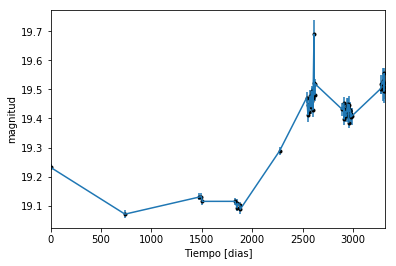

In [2]:
data = np.genfromtxt('LC_R_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=6, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

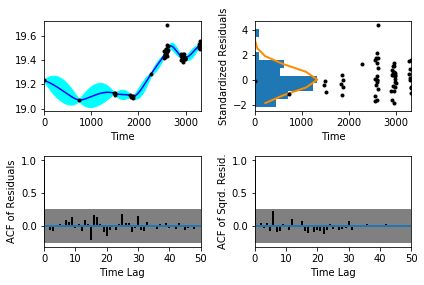

In [5]:
sample.assess_fit()

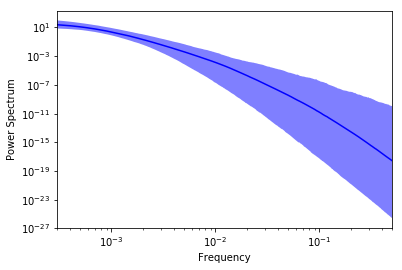

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0419665,'Nivel de ruido')

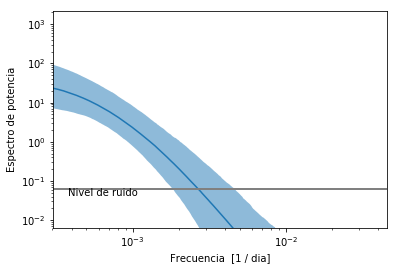

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 512.620651166
Median: 0.0325508530621
Standard deviation: 0.244055534755
68% credibility interval: [ 0.          0.39925104]
95% credibility interval: [ 0.         0.8753265]
99% credibility interval: [ 0.          0.98736949]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 512.620651166
Median: 0.0325508530621
Standard deviation: 0.244055534755
68% credibility interval: [ 0.          0.39925104]
95% credibility interval: [ 0.         0.8753265]
99% credibility interval: [ 0.          0.98736949]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1095.96354248
Median: 0.0
Standard deviation: 0.0714076854768
68% credibil

Plotting parameter summary


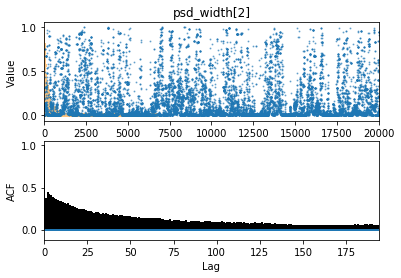

In [12]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1617.84065992
Median: 134.731573309
Standard deviation: 1.52236039453
68% credibility interval: [ 133.01303012  135.80762158]
95% credibility interval: [ 130.6163365   136.39680785]
99% credibility interval: [ 128.6000808   136.60477026]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 7)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 613.358935713
Median: 1.9268185373
Standard deviation: 2.63993663414
68% credibility interval: [ 0.25163193  5.59181953]
95% credibility interval: [ 0.03744098  8.87543954]
99% credibility interval: [  0.02119149  11.4911613 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 509.433340286
Median: 2.13818116626
Standard deviation: 10.6057632217
68% credibility interval: [  0.14032637  14.23182645]
95% credibility interval: [  9.02238310e-

In [17]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11336.400455
Median: 3.10483693337e-26
Standard deviation: 23141.5230665
68% credibility interval: [  3.53919014e-56   1.63855557e-11]
95% credibility interval: [  6.00071972e-90   6.07741102e-04]
99% credibility interval: [  7.94296999e-100   1.28000000e+002]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 11997.7336437
Median: 4.99361472938e-19
Standard deviation: 9.32584176466e+21
68% credibility interval: [  6.74707241e-40   7.89812

In [19]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2163.72517552
Median: 19.2755292203
Standard deviation: 0.115691444391
68% credibility interval: [ 19.1728665   19.37921316]
95% credibility interval: [ 19.05144433  19.52212525]
99% credibility interval: [ 18.95184336  19.6308434 ]


In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 512.620651166
Median: 0.0325508530621
Standard deviation: 0.244055534755
68% credibility interval: [ 0.          0.39925104]
95% credibility interval: [ 0.         0.8753265]
99% credibility interval: [ 0.          0.98736949]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 512.620651166
Median: 0.0325508530621
Standard deviation: 0.244055534755
68% credibility interval: [ 0.          0.39925104]
95% credibility interval: [ 0.         0.8753265]
99% credibility interval: [ 0.          0.98736949]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1095.96354248
Median: 0.0
Standard deviation: 0.0714076854768
68% credibil

In [23]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1617.84065992
Median: 134.731573309
Standard deviation: 1.52236039453
68% credibility interval: [ 133.01303012  135.80762158]
95% credibility interval: [ 130.6163365   136.39680785]
99% credibility interval: [ 128.6000808   136.60477026]


In [25]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 6)

In [26]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 291.79747442
Median: 0.00809275331425
Standard deviation: 0.190416048306
68% credibility interval: [ 0.00083193  0.16453502]
95% credibility interval: [  3.54211393e-04   7.52136063e-01]
99% credibility interval: [  3.08750105e-04   9.42902531e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 282.7206703
Median: 0.00228140610133
Standard deviation: 0.0849470634669
68% credibility interval: [ 0.00049576  0.03011488]
95% credibility interval: [ 0.0003196   0.28326235]
99% credibility interval: [  3.05179465e-04   6.21780324e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 515.573359157
Median: 0.0361908147412
Standard de

In [27]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1714.45037299
Median: 0.0361604755913
Standard deviation: 0.038195984929
68% credibility interval: [ 0.02001623  0.07106835]
95% credibility interval: [ 0.0124109  0.1400791]
99% credibility interval: [ 0.00937546  0.23053965]


In [29]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2490.7915786
Median: 1.1701292375
Standard deviation: 0.174067013416
68% credibility interval: [ 1.01374254  1.35690563]
95% credibility interval: [ 0.8929056   1.56444749]
99% credibility interval: [ 0.8228502   1.73446347]


In [31]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1212.7329908
Median: 1.34232931423e-06
Standard deviation: 0.0058866959735
68% credibility interval: [  1.51037547e-08   7.18862796e-05]
95% credibility interval: [  1.45430634e-10   4.07692200e-03]
99% credibility interval: [  1.62316482e-11   3.35117261e-02]


In [33]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 6)

In [34]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 291.79747442
Median: (-0.0508482687187-0.108211794979j)
Standard deviation: 1.94496176757
68% credibility interval: [-1.03380400+0.j        -0.00522714-0.1026222j]
95% credibility interval: [ -4.72581026e+00+0.j          -2.22557582e-03-0.02820858j]
99% credibility interval: [ -5.92443133e+00+0.j         -1.93993412e-03-2.8365266j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 282.7206703
Median: (-0.0143344972956+0.0702798868219j)
Standard deviation: 1.62367900107
68% credibility interval: [-0.18921735+4.12997158j -0.00311495+0.j        ]
95% credibility interval: [-1.77978981 +2.72532509e+00j -0.00200809 +1.62987186e-03j]
99% credibility interval: [ -3.90676099e+00+3.75313005j  -1.91749913e-03+2.02496808j]
Posterio

Plotting 2d PDF w KDE


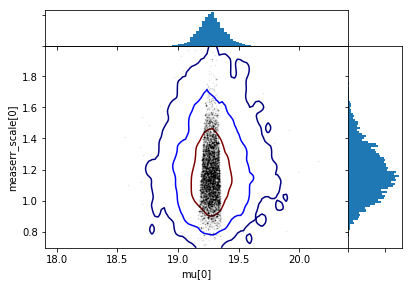

In [35]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


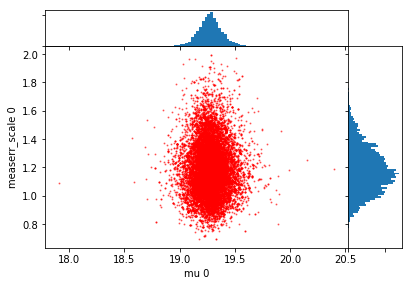

In [36]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


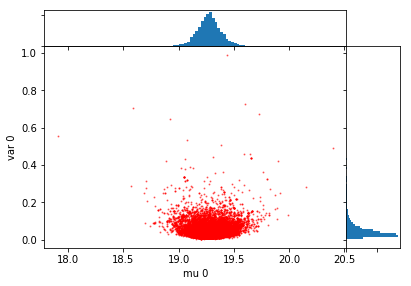

In [37]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


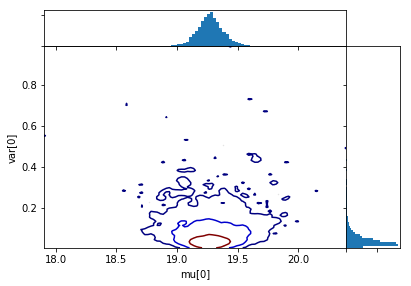

In [38]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

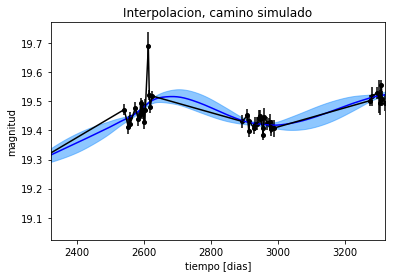

In [39]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

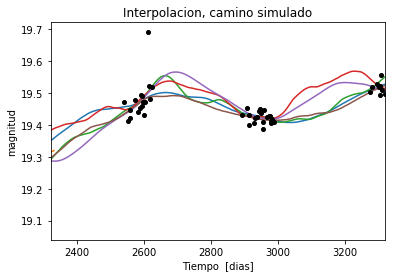

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')